#Load Dataset & Examine Class Distribution

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("synthetic_food_dataset_imbalanced.csv")

# Basic info
print("Dataset Shape:", df.shape)
print("\nColumns:\n", df.columns)

Dataset Shape: (31700, 16)

Columns:
 Index(['Calories', 'Protein', 'Fat', 'Carbs', 'Sugar', 'Fiber', 'Sodium',
       'Cholesterol', 'Glycemic_Index', 'Water_Content', 'Serving_Size',
       'Meal_Type', 'Preparation_Method', 'Is_Vegan', 'Is_Gluten_Free',
       'Food_Name'],
      dtype='object')


In [2]:
# Class distribution
print("\nClass Distribution (Meal_Type):")
print(df["Meal_Type"].value_counts())


Class Distribution (Meal_Type):
Meal_Type
snack        8001
breakfast    7970
dinner       7873
lunch        7856
Name: count, dtype: int64


In [3]:
print("\nClass Distribution (%):")
print(df["Meal_Type"].value_counts(normalize=True) * 100)


Class Distribution (%):
Meal_Type
snack        25.239748
breakfast    25.141956
dinner       24.835962
lunch        24.782334
Name: proportion, dtype: float64


Visualize Class Distribution (Imbalance Check)

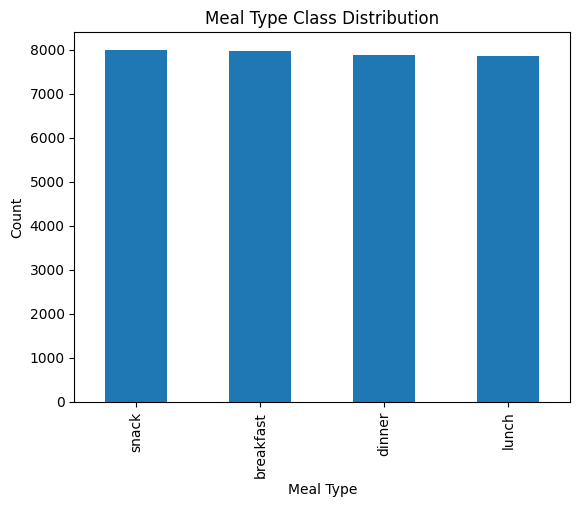

In [4]:
import matplotlib.pyplot as plt

df["Meal_Type"].value_counts().plot(
    kind="bar",
    title="Meal Type Class Distribution",
    ylabel="Count",
    xlabel="Meal Type"
)
plt.show()


Visualize Sample Entries (Inter-Class Variation)

In [5]:
# Sample 3 rows from each class
sample_df = df.groupby("Meal_Type").sample(3, random_state=42)

sample_df[[
    "Food_Name", "Calories", "Protein", "Fat", "Carbs",
    "Sugar", "Fiber", "Sodium", "Glycemic_Index",
    "Meal_Type"
]]


,Food_Name,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Glycemic_Index,Meal_Type
10740,Pasta,280.450324,6.597113,10.957100,34.489338,1.728542,2.466842,12.428020,62.064049,breakfast
20821,Pasta,289.851990,6.875734,9.435635,40.978931,2.208615,2.878897,25.567705,60.916704,breakfast
20742,Sushi,219.029741,4.274958,4.532084,28.634228,3.731920,0.000000,296.943196,74.264224,breakfast
23008,Sushi,179.750404,6.536602,10.366702,23.493217,5.098050,2.061714,290.164887,72.110926,dinner
23086,Sushi,192.275055,8.449866,3.614808,25.638233,5.072056,4.450383,265.259899,69.147717,dinner
3625,Ice Cream,205.116635,2.616726,8.739518,30.850577,20.310759,0.405950,63.197564,67.737313,dinner
25286,Ice Cream,185.229332,3.669376,11.035808,27.561501,16.429984,0.798549,59.459595,65.578053,lunch
25230,Steak,390.558013,18.726503,15.287673,0.000000,0.000000,0.000000,102.108318,0.000000,lunch
16980,Pasta,367.856341,8.296903,10.856927,44.753098,2.476474,1.369889,38.355886,68.963033,lunch
670,Burger,352.175353,13.988581,19.143579,42.983735,4.793873,1.476218,770.368403,69.195603,snack


Statistical Summary (Noise & Range Check)

In [7]:
df.describe()

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size
count,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000
mean,273.378441,9.523802,12.476848,28.943200,8.543813,1.904044,335.387611,26.865167,64.213509,48.976592,150.731940
std,111.457160,8.024212,8.425834,12.668795,7.989075,1.779542,319.066106,24.965067,25.390239,20.738749,51.796599
min,60.786204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.465039,58.575705
25%,210.301731,3.858307,8.245636,25.098800,3.739656,0.741204,63.000654,12.701920,59.984731,38.994221,109.511113
50%,281.774249,9.091637,11.574161,29.681430,5.500479,1.646608,292.525242,23.285882,68.436204,45.613748,151.706514
75%,329.821946,12.683957,15.818611,34.635789,14.426303,2.668750,631.367901,35.132214,75.464697,52.399496,189.083806
max,1289.956763,81.761772,88.619611,140.585537,78.548162,18.891993,2724.236846,260.149443,286.126400,251.837472,554.719629


Missing Values & Noise Detection

In [8]:
# Missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Duplicate rows
print("\nDuplicate Rows:", df.duplicated().sum())



Missing Values:
Calories              375
Protein               375
Fat                   375
Carbs                 375
Sugar                 375
Fiber                 375
Sodium                375
Cholesterol           375
Glycemic_Index        375
Water_Content         375
Serving_Size          375
Meal_Type               0
Preparation_Method      0
Is_Vegan                0
Is_Gluten_Free          0
Food_Name               0
dtype: int64

Duplicate Rows: 313


Feature Distribution (Numeric Columns)

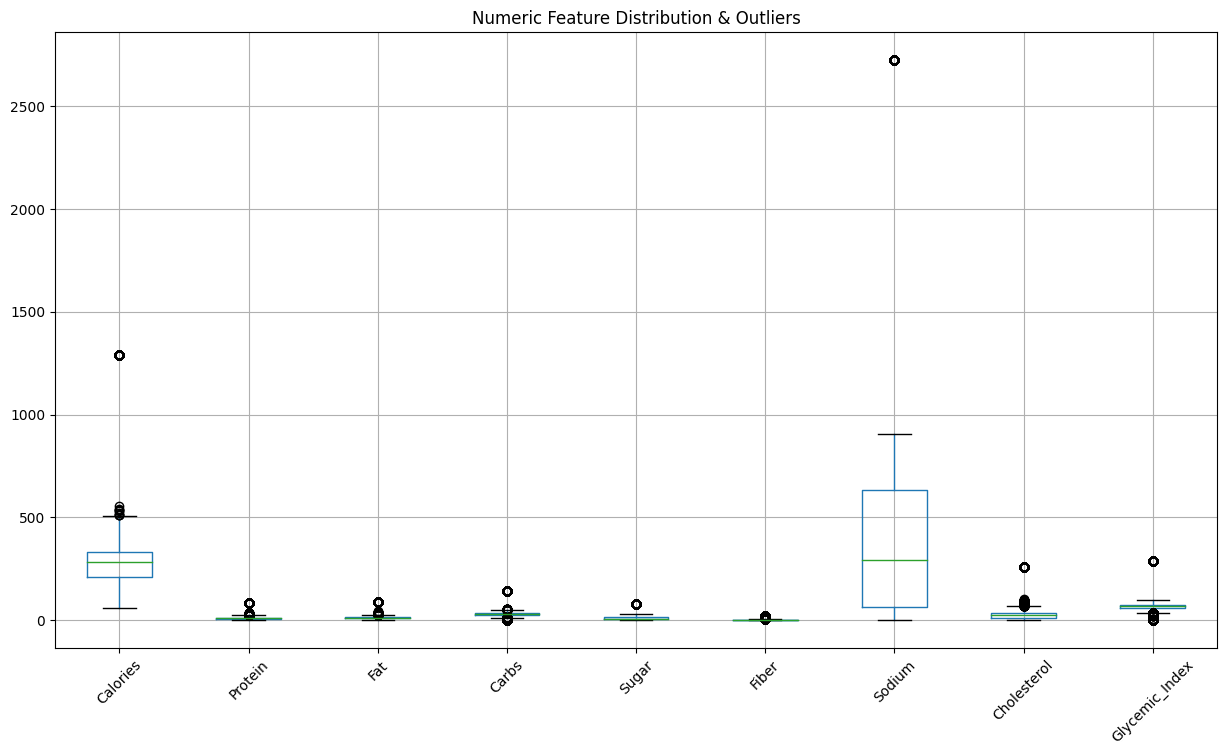

In [9]:
import seaborn as sns

numeric_cols = [
    "Calories","Protein","Fat","Carbs","Sugar",
    "Fiber","Sodium","Cholesterol","Glycemic_Index"
]

plt.figure(figsize=(15,8))
df[numeric_cols].boxplot(rot=45)
plt.title("Numeric Feature Distribution & Outliers")
plt.show()


In [10]:
# Separate columns
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

# Impute numerical columns with median
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Impute categorical columns with mode
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("Missing values after imputation:\n", df.isnull().sum())

Missing values after imputation:
 Calories              0
Protein               0
Fat                   0
Carbs                 0
Sugar                 0
Fiber                 0
Sodium                0
Cholesterol           0
Glycemic_Index        0
Water_Content         0
Serving_Size          0
Meal_Type             0
Preparation_Method    0
Is_Vegan              0
Is_Gluten_Free        0
Food_Name             0
dtype: int64


Detect and Handle Outliers

In [11]:
def cap_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        df[col] = df[col].clip(lower, upper)
    return df

df = cap_outliers_iqr(df, num_cols)


Remove Duplicate Entries

In [12]:
before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]

print(f"Duplicates removed: {before - after}")


Duplicates removed: 313


Normalize / Standardize Numerical Features

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print("Numerical features standardized successfully")


Numerical features standardized successfully


In [14]:
print("Final Dataset Shape:", df.shape)
df.head()


Final Dataset Shape: (31387, 16)


,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Meal_Type,Preparation_Method,Is_Vegan,Is_Gluten_Free,Food_Name
0,0.243578,0.837607,0.318165,0.736826,-0.531400,-0.402045,1.148411,-0.005976,1.146656,-0.091096,1.090237,dinner,fried,False,False,Pizza
1,-0.648255,-0.824014,-0.072987,-0.728375,1.253870,-1.277254,-0.925415,0.539295,0.273884,0.249674,-1.024079,snack,raw,False,True,Ice Cream
2,0.704542,0.835441,1.182846,0.032971,-0.310855,-0.776629,1.204354,0.569464,-0.230814,-0.541862,1.122252,snack,raw,False,False,Burger
3,-0.815033,0.045984,-1.022762,0.351451,-0.817081,-0.086193,-0.093790,0.200195,0.213521,0.865951,-0.304980,lunch,fried,False,True,Sushi
4,0.060628,-0.497066,0.643231,0.066717,1.409641,-0.270707,-0.109674,-0.567398,0.336341,-1.108746,-1.719119,snack,baked,False,False,Donut


Encode Class Labels & Categorical Features

In [15]:
from sklearn.preprocessing import LabelEncoder

# Encode target label
label_encoder = LabelEncoder()
df["Meal_Type_Encoded"] = label_encoder.fit_transform(df["Meal_Type"])

# Mapping for reference
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)


Label Mapping: {'breakfast': 0, 'dinner': 1, 'lunch': 2, 'snack': 3}


In [16]:
# One-hot encode categorical input features
categorical_features = ["Food_Name", "Preparation_Method"]

df = pd.get_dummies(df, columns=categorical_features, drop_first=True)


In [17]:
from sklearn.decomposition import PCA

# Separate features and target
X = df.drop(["Meal_Type", "Meal_Type_Encoded"], axis=1)
y = df["Meal_Type_Encoded"]


In [18]:
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X)

print("Original Feature Count:", X.shape[1])
print("Reduced Feature Count:", X_pca.shape[1])


Original Feature Count: 25
Reduced Feature Count: 11


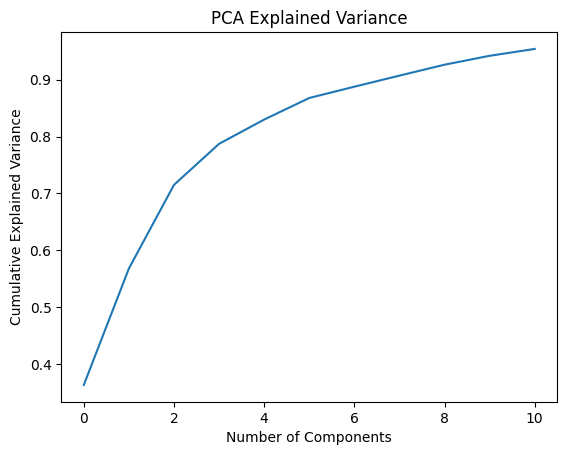

In [19]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.show()


In [20]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=15)
X_selected = selector.fit_transform(X, y)

print("Selected Feature Count:", X_selected.shape[1])


Selected Feature Count: 15


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [22]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(
    max_iter=1000,
    multi_class="auto",
    class_weight="balanced",  # handles class imbalance
    random_state=42
)

log_reg.fit(X_train, y_train)

c:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(class_weight='balanced', max_iter=1000, multi_class='auto',
                   random_state=42)

In [23]:
y_pred = log_reg.predict(X_test)


In [24]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)


Logistic Regression Accuracy: 0.2559732398853138


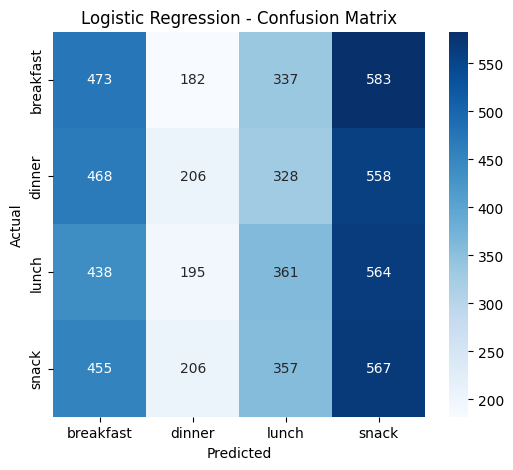

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression - Confusion Matrix")
plt.show()


In [26]:
from sklearn.metrics import classification_report

print(classification_report(
    y_test, y_pred,
    target_names=label_encoder.classes_
))

              precision    recall  f1-score   support

   breakfast       0.26      0.30      0.28      1575
      dinner       0.26      0.13      0.18      1560
       lunch       0.26      0.23      0.25      1558
       snack       0.25      0.36      0.29      1585

    accuracy                           0.26      6278
   macro avg       0.26      0.26      0.25      6278
weighted avg       0.26      0.26      0.25      6278



In [27]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(
    criterion="gini",
    max_depth=10,              # controls overfitting
    min_samples_split=10,
    class_weight="balanced",   # handles class imbalance
    random_state=42
)

dt_model.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=10, random_state=42)

In [28]:
y_pred_dt = dt_model.predict(X_test)


In [29]:
from sklearn.metrics import accuracy_score

dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", dt_accuracy)


Decision Tree Accuracy: 0.2433896145269194


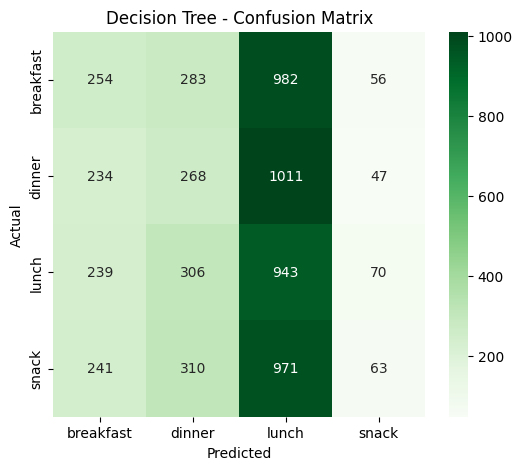

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm_dt,
    annot=True,
    fmt="d",
    cmap="Greens",
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree - Confusion Matrix")
plt.show()


In [31]:
from sklearn.metrics import classification_report

print(classification_report(
    y_test, y_pred_dt,
    target_names=label_encoder.classes_
))


              precision    recall  f1-score   support

   breakfast       0.26      0.16      0.20      1575
      dinner       0.23      0.17      0.20      1560
       lunch       0.24      0.61      0.35      1558
       snack       0.27      0.04      0.07      1585

    accuracy                           0.24      6278
   macro avg       0.25      0.24      0.20      6278
weighted avg       0.25      0.24      0.20      6278



In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [37]:
from sklearn.ensemble import RandomForestClassifier

rf_pca = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight="balanced",
    n_jobs=-1,
    random_state=42
)

rf_pca.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=300, n_jobs=-1,
                       random_state=42)

In [38]:
y_pred_rf_pca = rf_pca.predict(X_test)


In [39]:
from sklearn.metrics import accuracy_score

rf_pca_accuracy = accuracy_score(y_test, y_pred_rf_pca)
print("Random Forest (with PCA) Accuracy:", rf_pca_accuracy)


Random Forest (with PCA) Accuracy: 0.2591589678241478


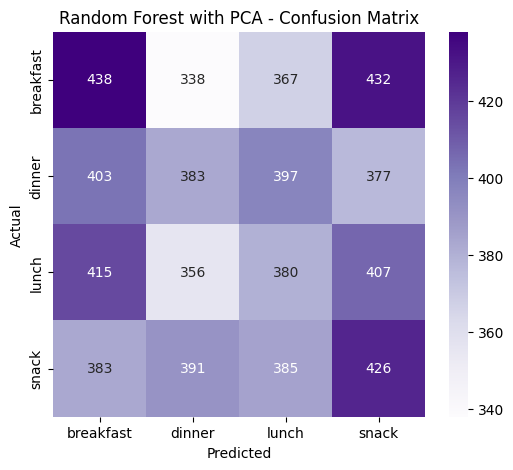

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_rf_pca = confusion_matrix(y_test, y_pred_rf_pca)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm_rf_pca,
    annot=True,
    fmt="d",
    cmap="Purples",
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest with PCA - Confusion Matrix")
plt.show()


In [41]:
from sklearn.metrics import classification_report

print(classification_report(
    y_test,
    y_pred_rf_pca,
    target_names=label_encoder.classes_
))


              precision    recall  f1-score   support

   breakfast       0.27      0.28      0.27      1575
      dinner       0.26      0.25      0.25      1560
       lunch       0.25      0.24      0.25      1558
       snack       0.26      0.27      0.26      1585

    accuracy                           0.26      6278
   macro avg       0.26      0.26      0.26      6278
weighted avg       0.26      0.26      0.26      6278



In [42]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(
    n_neighbors=7,     # good starting point
    weights="distance",
    metric="minkowski" # euclidean distance
)

knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=7, weights='distance')

In [43]:
y_pred_knn = knn.predict(X_test)


In [44]:
from sklearn.metrics import accuracy_score

knn_accuracy = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", knn_accuracy)


KNN Accuracy: 0.24546033768716152


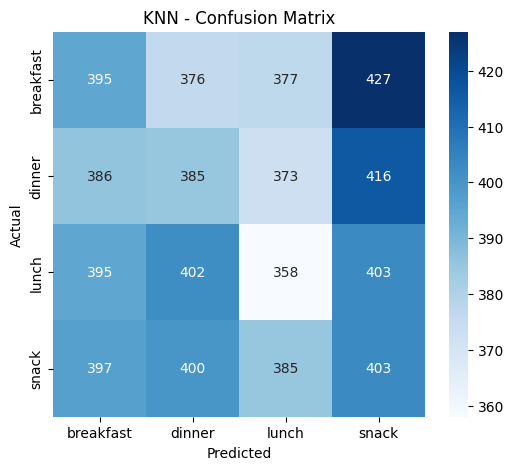

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm_knn,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNN - Confusion Matrix")
plt.show()


In [46]:
from sklearn.metrics import classification_report

print(classification_report(
    y_test,
    y_pred_knn,
    target_names=label_encoder.classes_
))


              precision    recall  f1-score   support

   breakfast       0.25      0.25      0.25      1575
      dinner       0.25      0.25      0.25      1560
       lunch       0.24      0.23      0.23      1558
       snack       0.24      0.25      0.25      1585

    accuracy                           0.25      6278
   macro avg       0.25      0.25      0.25      6278
weighted avg       0.25      0.25      0.25      6278



In [47]:
from sklearn.svm import SVC

svm_model = SVC(
    kernel="rbf",
    C=10,
    gamma="scale",
    class_weight="balanced",
    probability=True,
    random_state=42
)

svm_model.fit(X_train, y_train)


SVC(C=10, class_weight='balanced', probability=True, random_state=42)

In [48]:
y_pred_svm = svm_model.predict(X_test)


In [49]:
from sklearn.metrics import accuracy_score

svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", svm_accuracy)


SVM Accuracy: 0.26537113730487416


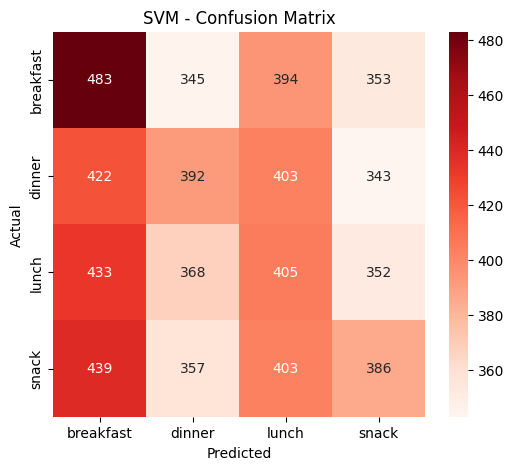

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm_svm,
    annot=True,
    fmt="d",
    cmap="Reds",
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM - Confusion Matrix")
plt.show()


In [51]:
from sklearn.metrics import classification_report

print(classification_report(
    y_test,
    y_pred_svm,
    target_names=label_encoder.classes_
))


              precision    recall  f1-score   support

   breakfast       0.27      0.31      0.29      1575
      dinner       0.27      0.25      0.26      1560
       lunch       0.25      0.26      0.26      1558
       snack       0.27      0.24      0.26      1585

    accuracy                           0.27      6278
   macro avg       0.27      0.27      0.26      6278
weighted avg       0.27      0.27      0.26      6278



In [52]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

X = df.drop(["Meal_Type", "Meal_Type_Encoded"], axis=1)
y = df["Meal_Type_Encoded"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

xgb_model = XGBClassifier(
    n_estimators=400,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="multi:softprob",
    num_class=len(label_encoder.classes_),
    eval_metric="mlogloss",
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=-1, num_class=4, ...)

XGBoost Accuracy: 0.2642561325262823


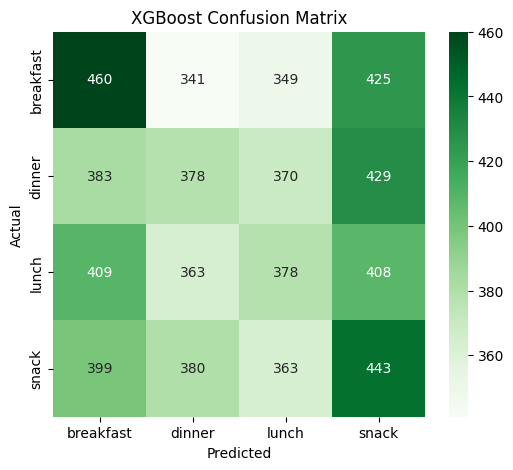

              precision    recall  f1-score   support

   breakfast       0.28      0.29      0.29      1575
      dinner       0.26      0.24      0.25      1560
       lunch       0.26      0.24      0.25      1558
       snack       0.26      0.28      0.27      1585

    accuracy                           0.26      6278
   macro avg       0.26      0.26      0.26      6278
weighted avg       0.26      0.26      0.26      6278



In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6,5))
sns.heatmap(
    cm_xgb,
    annot=True,
    fmt="d",
    cmap="Greens",
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_
)
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(
    y_test, y_pred_xgb,
    target_names=label_encoder.classes_
))


In [54]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop(["Meal_Type", "Meal_Type_Encoded"], axis=1)
y = df["Meal_Type_Encoded"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

gb_model = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.9,
    random_state=42
)

gb_model.fit(X_train, y_train)


GradientBoostingClassifier(learning_rate=0.05, n_estimators=300,
                           random_state=42, subsample=0.9)

In [55]:
y_pred_gb = gb_model.predict(X_test)
from sklearn.metrics import accuracy_score

gb_accuracy = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", gb_accuracy)


Gradient Boosting Accuracy: 0.25278751194647975


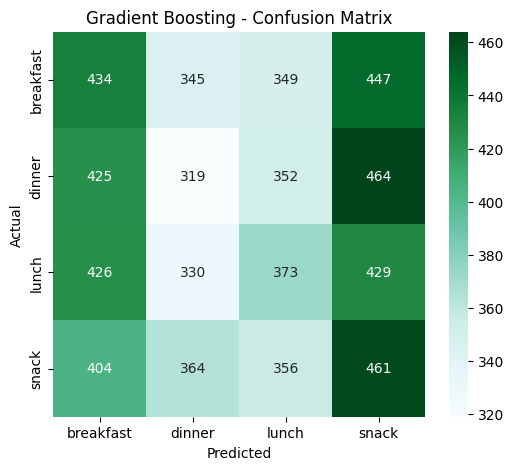

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_gb = confusion_matrix(y_test, y_pred_gb)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm_gb,
    annot=True,
    fmt="d",
    cmap="BuGn",
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Gradient Boosting - Confusion Matrix")
plt.show()


In [57]:
from sklearn.metrics import classification_report

print(classification_report(
    y_test,
    y_pred_gb,
    target_names=label_encoder.classes_
))


              precision    recall  f1-score   support

   breakfast       0.26      0.28      0.27      1575
      dinner       0.23      0.20      0.22      1560
       lunch       0.26      0.24      0.25      1558
       snack       0.26      0.29      0.27      1585

    accuracy                           0.25      6278
   macro avg       0.25      0.25      0.25      6278
weighted avg       0.25      0.25      0.25      6278



In [66]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

results = []

def collect_results(model_name, y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_test, y_pred, average="weighted"
    )
    
    results.append({
        "Model": model_name,
        "Accuracy": round(acc, 3),
        "Precision": round(precision, 3),
        "Recall": round(recall, 3),
        "F1-Score": round(f1, 3)
    })


In [67]:
collect_results(
    "Logistic Regression (PCA)",
    y_test,
    y_pred
)

In [68]:
collect_results(
    "Decision Tree (PCA)",
    y_test,
    y_pred_dt
)


In [69]:
collect_results(
    "Random Forest (PCA)",
    y_test,
    y_pred_rf_pca
)


In [70]:
collect_results(
    "KNN (PCA)",
    y_test,
    y_pred_knn
)


In [71]:
collect_results(
    "SVM (PCA)",
    y_test,
    y_pred_svm
)


In [72]:
collect_results(
    "Gradient Boosting",
    y_test,
    y_pred_gb
)


In [73]:
collect_results(
    "XGBoost",
    y_test,
    y_pred_xgb
)


In [74]:
comparison_df = pd.DataFrame(results)
comparison_df = comparison_df.sort_values(by="Accuracy", ascending=False)

comparison_df


,Model,Accuracy,Precision,Recall,F1-Score
4,SVM (PCA),0.265,0.265,0.265,0.265
6,XGBoost,0.264,0.264,0.264,0.264
2,Random Forest (PCA),0.259,0.259,0.259,0.259
0,Logistic Regression (PCA),0.256,0.257,0.256,0.248
5,Gradient Boosting,0.253,0.252,0.253,0.252
3,KNN (PCA),0.245,0.245,0.245,0.245
1,Decision Tree (PCA),0.238,0.238,0.238,0.238


In [75]:
best_model = comparison_df.iloc[0]

print("🏆 Best Model Identified:")
print(best_model)


🏆 Best Model Identified:
Model        SVM (PCA)
Accuracy         0.265
Precision        0.265
Recall           0.265
F1-Score         0.265
Name: 4, dtype: object
